In [2]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Using TensorFlow backend.


In [22]:
num_classes = 20
img_rows = 32
img_cols = 32
batch_size = 16

train_data_dir = 'simpsons/train'
validation_data_dir = 'simpsons/validation'

#Data augmentation
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range = 30,
                                  width_shift_range = 0.3,
                                  height_shift_range = 0.3,
                                  horizontal_flip = True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_rows,img_cols),
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                             target_size=(img_rows,img_cols),
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                             shuffle=False)

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [7]:
## Custom Creation of Little VGG Model

In [8]:
model = Sequential()

#First CONV_relu layer
model.add(Conv2D(64,(3,3),padding='same',input_shape = (img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Second CONV-Relu layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max Pooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#3RD set of CONV-relu layer
model.add(Conv2D(128,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#4rD set of CONV-relu layer
model.add(Conv2D(128,(3,3),padding='same',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max Pooling with dropout
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [ ]:
## Training

In [9]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [10]:
checkpoint = ModelCheckpoint("/home/deeplearningcv/DeepLearningCV/Trained Models/simpsons_little_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - ETA: 0s - loss: 2.8157 - accuracy: 0.1752
Epoch 00001: val_loss improved from inf to 3.53788, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\simpsons_little_vgg.h5
1221/1221 [==============================] - 305s 250ms/step - loss: 2.8157 - accuracy: 0.1752 - val_loss: 3.5379 - val_accuracy: 0.1096
Epoch 2/10
1221/1221 [==============================] - ETA: 0s - loss: 2.2313 - accuracy: 0.3213
Epoch 00002: val_loss improved from 3.53788 to 2.25679, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\simpsons_little_vgg.h5
1221/1221 [==============================] - 213s 175ms/step - loss: 2.2313 - accuracy: 0.3213 - val_loss: 2.2568 - val_accuracy: 0.3709
Epoch 3/10
1221/1221 [==============================] - ETA: 0s - loss: 1.8802 - accuracy: 0.4361
Epoch 00003: val_loss improved from 2.25679 to 1.63067, saving model to /home/deeplearningcv/DeepLearningCV/Trained Models\simpsons_little_vgg.h

## Result

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

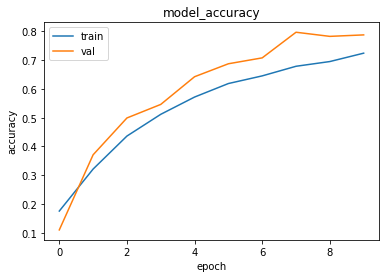

In [13]:
losses = history.history['accuracy']
val_losses = history.history['val_accuracy']
plt.plot(losses)
plt.plot(val_losses)
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='best')

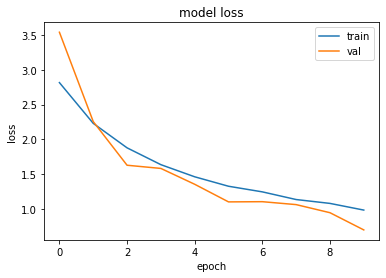

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

## Prediction and Evaluation

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [24]:
y_pred = model.predict(validation_generator)
y_pred_true = np.argmax(y_pred,axis=1)
label_map = (train_generator.class_indices)

In [25]:

print(classification_report(validation_generator.classes,y_pred_true,target_names=label_map.keys()))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.44      0.61        48
  apu_nahasapeemapetilon       1.00      0.96      0.98        50
            bart_simpson       0.69      0.90      0.78        50
charles_montgomery_burns       0.76      0.71      0.73        48
            chief_wiggum       0.51      0.96      0.67        50
          comic_book_guy       0.78      0.51      0.62        49
          edna_krabappel       1.00      0.66      0.80        50
           homer_simpson       0.64      0.90      0.75        50
           kent_brockman       0.95      0.82      0.88        50
        krusty_the_clown       0.87      0.92      0.89        50
           lenny_leonard       0.95      0.78      0.86        50
            lisa_simpson       0.87      0.68      0.76        50
           marge_simpson       0.95      0.74      0.83        50
            mayor_quimby       0.92      0.66      0.77        50
     milh

In [26]:
df_cm = pd.DataFrame(confusion_matrix(validation_generator.classes,y_pred_true),label_map.keys(),label_map.keys())

Text(194.09375, 0.5, 'label (ground truth)')

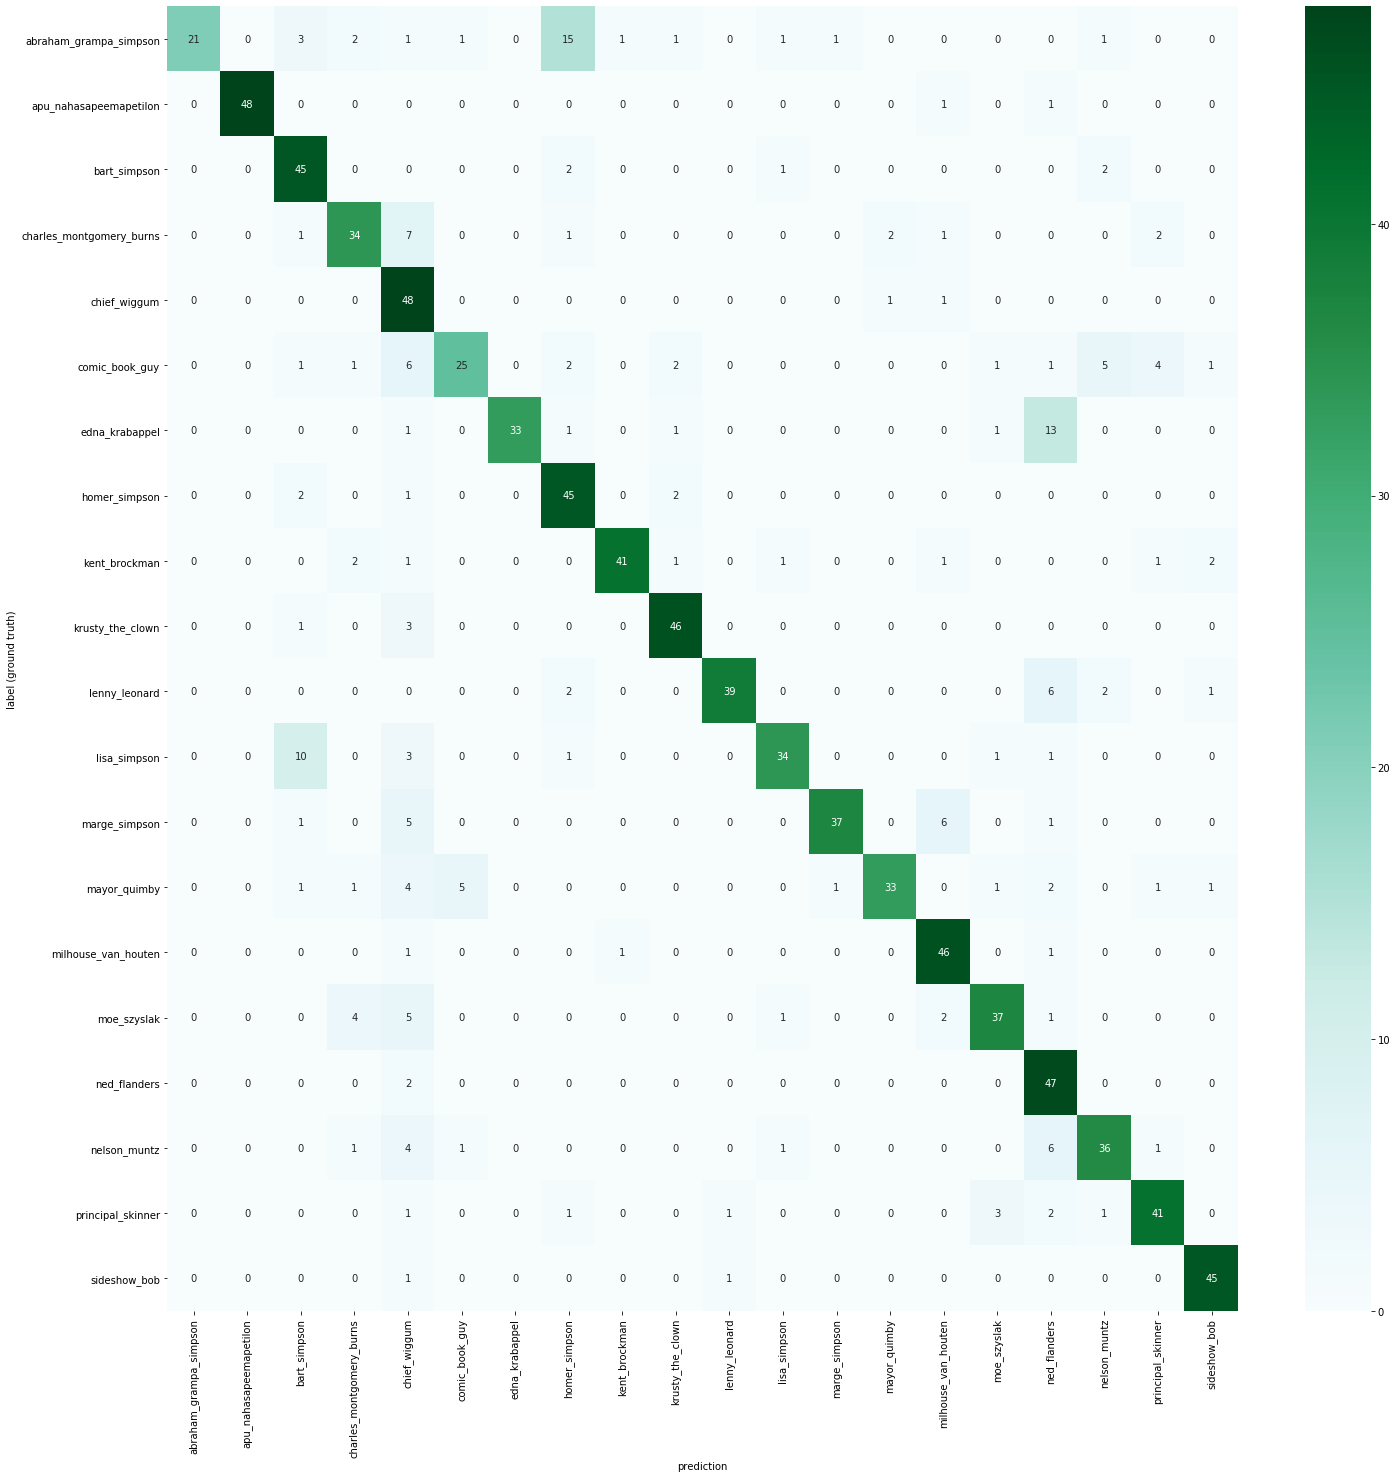

In [27]:
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes,y_pred))
plt.figure(figsize=(24,24))
sns.heatmap(df_cm,annot=True,cmap='BuGn',fmt="d")
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")